In [3]:
import os
os.chdir(r"E:\kdg\Data 3\data3\data_aux")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

#precision: # decimals
#spread: 1-5 -> 1:small,.., 5: large (not applicable on type 1)

def createPopulation (min, max, precision, spread, number, type):
    factor=1.0
    for i in range (0, precision):
        factor = factor * 10.0
    pop = np.empty(number,dtype=np.float64)
    if (type == 0): # uniform distribution
        for i in range (0,number):
            value = np.random.random() * (max-min) + min
            value = math.trunc(value * factor)/factor
            pop[i]=math.trunc(value * factor)/factor
    else: # normal distribution
        for i in range (0,number):
            while True:
                value = np.random.normal()
                value = value * spread/6 + (min+max)/2
                if min <= value <= max:
                   break
            pop[i] = math.trunc(value * factor)/factor
    return pop

def createSample(pop,size):
    sample = np.empty(size,dtype=np.float64)
    pop_size = len(pop)
    for i in range (0,size):
        index = np.random.randint(0,pop_size)
        sample[i]=pop[index]
    return sample

def simulationSamples (pop, number, sample_size):
    sim = np.empty(number,dtype=np.float64)
    for i in range (0,number):
        sim[i]=createSample(pop,sample_size).mean()
    return sim

def calculateCutpoints (pop, number):
    cutpoints = np.empty(number+1,dtype=np.float64)
    cutpoints[0] = math.floor(pop.min())
    step = math.trunc(((math.ceil(pop.max()) - math.floor(pop.min())) /number) + 0.5)
    for i in range (1, number+1):
        cutpoints[i] = cutpoints[i-1] + step
    return cutpoints

# Simulation of a sample mean of a uniform distribution

Create population of 15.000 numbers between 145 and 210
Numbers will be uniformily normally distributed.

Select a sample of the above population:

177.61362 18.86641535892815


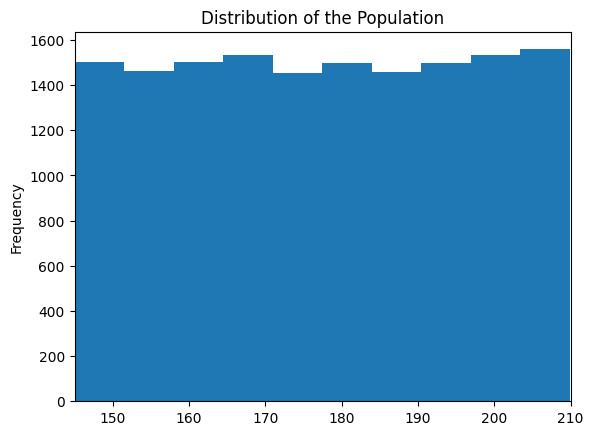

In [4]:
min = 145
max = 210
# Create population with 15000 numbers between 145 and 210
# Numbers will be normal distributed with mean = (145+210)/2
# and standard deviation = 25/6
population = createPopulation (min,max,1,0,15000,0)
print(population.mean(), population.std())
plt.figure()
pd.Series(population).plot.hist(title='Distribution of the Population', xlim=[min,max])
plt.show()

In [8]:
sample = createSample(population,15)
print(sample.mean(), sample.std())

174.36666666666665 19.801234529414796


Do this multiple times and plot the mean of each sample (and the mean and standard deviation of all the means:

Population mean : 177.61362
Population stddev : 18.86641535892815

Samples mean (of the means) : 177.4367266666667
Samples stddev (of the means) : 4.895218192476772

Population stddev / sqrt(15) : 4.871287499184037


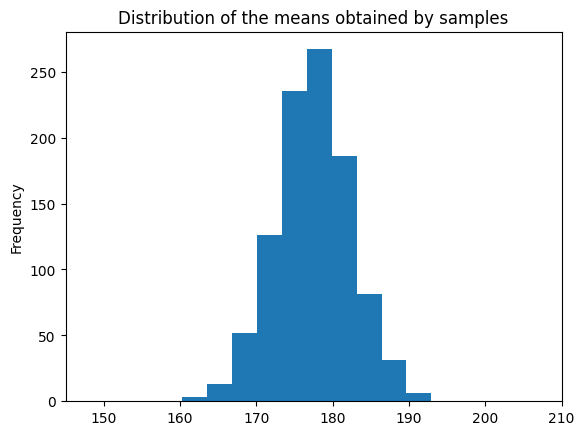

In [9]:
simulations = simulationSamples (population,1000,15)
print('Population mean : ' + str(population.mean()))
print('Population stddev : ' + str(population.std()))
print()
print('Samples mean (of the means) : ' + str(simulations.mean()))
print('Samples stddev (of the means) : ' + str(simulations.std()))
print()
print('Population stddev / sqrt(15) : ' + str(population.std()/np.sqrt(15)))

plt.figure()
pd.Series(simulations).plot.hist(title='Distribution of the means obtained by samples', xlim=[min,max])
plt.show()

# Simulation of a sample mean of a normal distribution

Create population of 15.000 numbers between 145 and 210
Numbers will be normally distributed with mean = (145+210)/2
and standard deviation = 25/6

177.4832733333333 4.1731541490766375


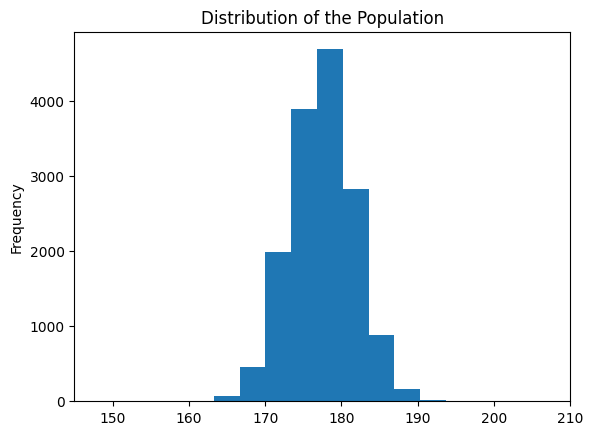

In [10]:
min = 145
max = 210
# Create population with 15000 numbers between 145 and 210
# Numbers will be normal distributed with mean = (145+210)/2
# and standard deviation = 25/6
population = createPopulation (min,max,1,25,15000,1)
print(population.mean(), population.std())
plt.figure()
pd.Series(population).plot.hist(title='Distribution of the Population', xlim=[min,max])
plt.show()

Select a sample out of the above population:

In [11]:
sample = createSample(population,15)
print(sample.mean(), sample.std())

175.9 5.653907203577599


Do this multiple times and plot the mean of each sample (and the mean and standard deviation of all the means:

Population mean : 177.4832733333333
Population stddev : 4.1731541490766375

Samples mean (of the means) : 177.47097999999997
Samples stddev (of the means) : 1.1041915773995024

Population stddev / sqrt(15) : 1.0775037680353468


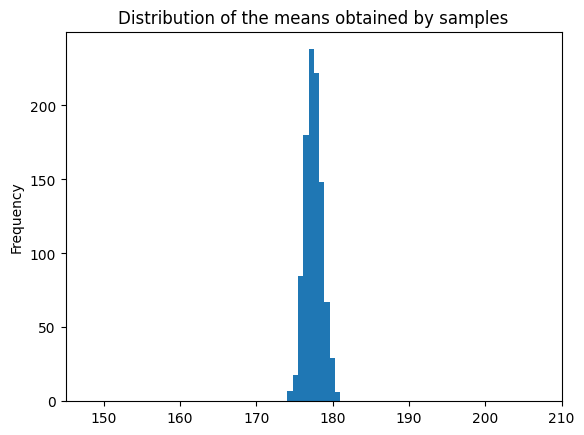

In [12]:
simulations = simulationSamples (population,1000,15)
print('Population mean : ' + str(population.mean()))
print('Population stddev : ' + str(population.std()))
print()
print('Samples mean (of the means) : ' + str(simulations.mean()))
print('Samples stddev (of the means) : ' + str(simulations.std()))
print()
print('Population stddev / sqrt(15) : ' + str(population.std()/np.sqrt(15)))

plt.figure()
pd.Series(simulations).plot.hist(title='Distribution of the means obtained by samples', xlim=[min,max])
plt.show()